In [328]:
# This will import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
%matplotlib inline 

# Load in the dataset as db
db = pd.read_csv('./survey.csv')


# Now we will see how our data looks like ( we will check the first 5 rows)

In [329]:
db.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Now we will see what kind of data types are available in the Data


In [330]:
db.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [331]:
print(db['Gender'].nunique())

49


# We can see that there are 49 unique values of Gender. We will see which are those and then work accoridngly.

In [332]:
print(db['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


# I will be using a filter function which can help to categorize the data columns as per our requirement.

In [333]:
def filter(x):
    if (x in ['Female','female','F','Woman','f','Femake','woman','Female ','femail']):
      return 'Female';
    elif (x in ['Male','m','male-ish', 'maile', 'mal', 'male (cis)', 'make', 'male ', 'man', 'msle', 'mail', 'malr','cis man', 'cis male']):
      return 'Male';    
    else:
      return 'Binary';    

db['Gender_new'] = db['Gender'].apply(filter);
print(db['Gender_new'].nunique());

3


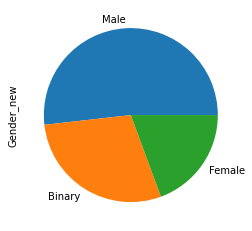

In [334]:
# Pie chart of the new gender Column
db['Gender_new'].value_counts()[:5].plot(kind='pie')

In [335]:
print(db['Country'].unique())

['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']


# We can see that there are number of Countries. But we will only focus on Canada and Non Canada Countries for this problem

In [336]:
def filter(x):
    if (x in ['Canada']):
      return 'Canada';    
    else:
      return 'Rest_of_the_World';    

db['new_Country'] = db['Country'].apply(filter);
print(db['new_Country'].unique());

print(db['work_interfere'].unique())

['Rest_of_the_World' 'Canada']
['Often' 'Rarely' 'Never' 'Sometimes' nan]


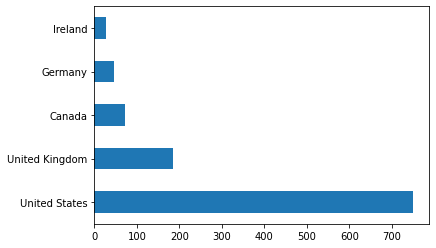

In [337]:
# We will show a bar chart with 5 most common countries in this data

db['Country'].value_counts()[:5].plot(kind='barh')

# We will divide our question in two parts:
1. How does the frequency of mental health illness vary by Geographic Location.?
2. How does the attitude towards mental health vary by Geographic location?

Lets do the First part. I will be making use of the work_interfere column as this will give me the right direction to analyze the data. With answer given in Work_interfere I can find out if the given person is suffering from mental sickness or not.

In [338]:

def filter(x):
    if (x in ["Never", "Rarely", "Sometimes", "Often"]):
      return 'Mentally_Not_Well';
    else:
      return 'Mentally_Well';    

db['Mental_Health'] = db['work_interfere'].apply(filter);
print(db['Mental_Health'].unique())

['Mentally_Not_Well' 'Mentally_Well']


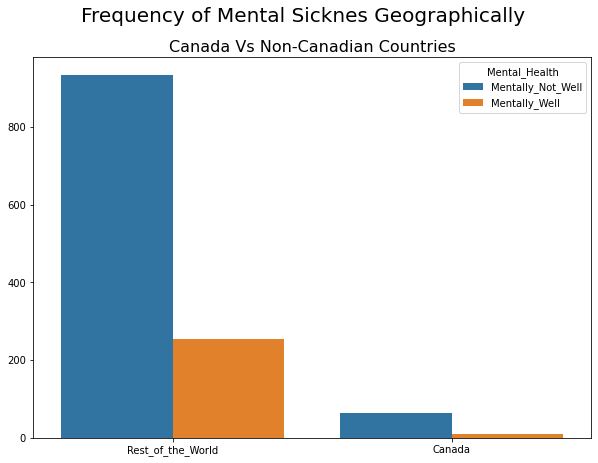

In [339]:
plt.figure(figsize=(10,7))
sns.countplot(x="new_Country", hue="Mental_Health", hue_order = ["Mentally_Not_Well", "Mentally_Well"], data=db)
plt.suptitle("Frequency of Mental Sicknes Geographically", fontsize=20)
plt.title("Canada Vs Non-Canadian Countries", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

# Now coming to the second part of the question. I will try to analyze how the attitude towards mental health varies with geographic location.

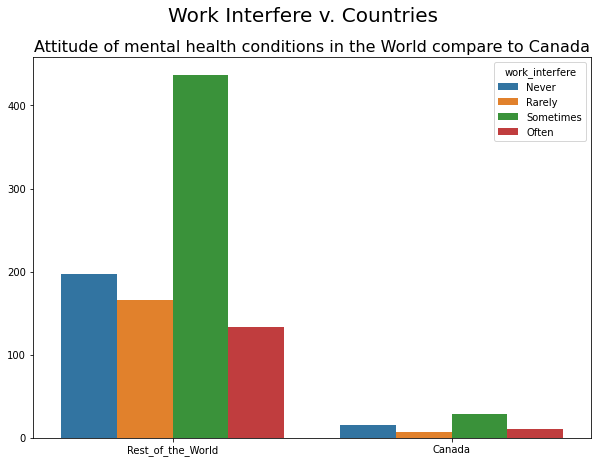

In [340]:
plt.figure(figsize=(10,7))
sns.countplot(x="new_Country", hue="work_interfere", hue_order = ["Never", "Rarely", "Sometimes", "Often"], data=db)
plt.suptitle("Work Interfere v. Countries", fontsize=20)
plt.title("Attitude of mental health conditions in the World compare to Canada", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [341]:
def filter(x):
    if (x in ["No"]):
      return 'Bad';
    else:
      return 'Good';    

db['Mental_Health_Employer_Response'] = db['mental_health_consequence'].apply(filter);
print(db['Mental_Health_Employer_Response'].unique())

['Bad' 'Good']


# Now we will see the effect of what the Employee Thinks about Employer Reponse about their mental condition.

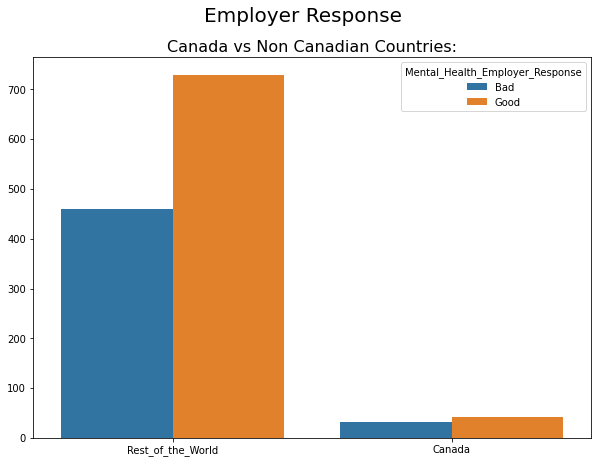

In [342]:
plt.figure(figsize=(10,7))
sns.countplot(x="new_Country", hue="Mental_Health_Employer_Response", hue_order = ["Bad", "Good"], data=db)
plt.suptitle("Employer Response", fontsize=20)
plt.title("Canada vs Non Canadian Countries:", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [343]:
def filter(x):
    if (x in ["No"]):
      return 'Not_Willing';
    else:
      return 'Willing';    

db['Mental_Health_Interview_Response'] = db['mental_health_interview'].apply(filter);
print(db['Mental_Health_Interview_Response'].unique())

['Not_Willing' 'Willing']


# Now we will analyze how much an Employee is ready to speak to their supervisors on their mental health condition.

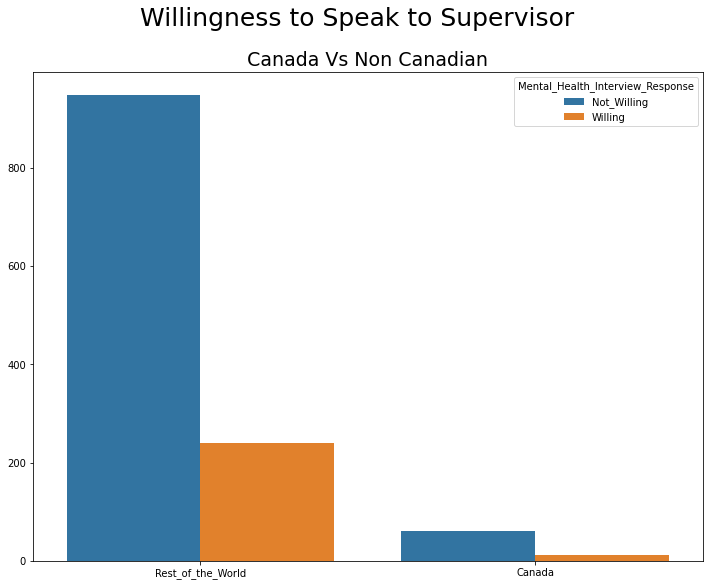

In [344]:
plt.figure(figsize=(12,9))
sns.countplot(x="new_Country", hue="Mental_Health_Interview_Response", hue_order = ["Not_Willing", "Willing"], data=db)
plt.suptitle("Willingness to Speak to Supervisor", fontsize=25)
plt.title("Canada Vs Non Canadian", fontsize=19)
plt.xlabel("")
plt.ylabel("")
plt.show()